In [1]:
# import the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Read the data
visa_df=pd.read_csv(r"C:\Users\rosha\OneDrive\Documents\Data Science\Batch-Jan23\5.Data-Files\Visadataset.csv")
visa_df.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Standatdization**

- Scaling the data into one scale

- Different columns has different units 

- We have 2 data techniques

    - **Standardisation - Z-Score** 
    
        - 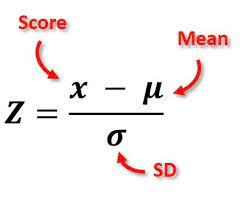
    
        - Value ranges from -3 to 3
    
    - **Normalization**

        - Min max scalar
    
        - 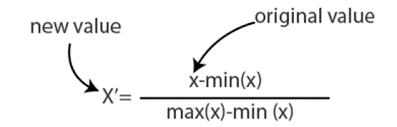
        
        - value ranges from 0 to 1
      
        
        
        
Notes: https://developers.google.com/machine-learning/data-prep/transform/normalization

In [22]:
# take prevaling wage column
# z-score = x-mean/sigma
# Step 2: Calculate mean of prevailing wage 
# Step 3: calculate std deviation of prevailing wage 
# Step 4: calculate numerator
# Step 5: prevailing wage Z_score

visa_df=pd.read_csv(r"C:\Users\rosha\OneDrive\Documents\Data Science\Batch-Jan23\5.Data-Files\Visadataset.csv")

prevailing_wage_mean=visa_df['prevailing_wage'].mean()
prevailing_wage_std=visa_df['prevailing_wage'].std()
numerator=visa_df['prevailing_wage']-prevailing_wage_mean
denominator=prevailing_wage_std
visa_df['prevailing_wage_z_score']=numerator/prevailing_wage_std
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_z_score
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398510
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169832
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919060
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169991
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428576
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049923
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876083
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360253
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221504


In [5]:
visa_df[['prevailing_wage','prevailing_wage_z_score']]

,prevailing_wage,prevailing_wage_z_score
0,592.2029,-1.398510
1,83425.6500,0.169832
2,122996.8600,0.919060
3,83434.0300,0.169991
4,149907.3900,1.428576
...,...,...
25475,77092.5700,0.049923
25476,279174.7900,3.876083
25477,146298.8500,1.360253
25478,86154.7700,0.221504


In [7]:
visa_df['prevailing_wage'].max(), visa_df['prevailing_wage_z_score'].max()
# the max value of z_score is more than 3 as this is outlier . 99.7% data is in range of -3 to 3

(319210.27, 4.634101837909902)

In [8]:
visa_df['prevailing_wage'].idxmax(), visa_df['prevailing_wage_z_score'].idxmax()
# in the prevailing_wage the max value id is 21077
# in the prevailing_wage_z_score the max value id is also 21077

(21077, 21077)

In [13]:
visa_df['prevailing_wage'].min(),visa_df['prevailing_wage'].idxmin()

(2.1367, 20575)

In [12]:
visa_df['prevailing_wage_z_score'].min(),visa_df['prevailing_wage_z_score'].idxmin()

(-1.4096818992891214, 20575)

In [14]:
# get only max and min value rows for prevailing_wage column

visa_df.iloc[[21077,20575]]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_z_score
21077,EZYV21078,Asia,High School,N,N,442,2006,Midwest,319210.2700,Year,Y,Denied,4.634102
20575,EZYV20576,North America,Master's,N,N,1552,2004,Northeast,2.1367,Hour,Y,Certified,-1.409682


In [15]:
required_cols=['prevailing_wage','prevailing_wage_z_score']
required_ids=[21077, 20575]
visa_df[required_cols].iloc[required_ids]

,prevailing_wage,prevailing_wage_z_score
21077,319210.2700,4.634102
20575,2.1367,-1.409682


In [ ]:
# Now we will do the same using package name StandardScalar

$StandardScalar$

In [24]:
# Read the package
from sklearn.preprocessing import StandardScaler

# save the package
ss=StandardScaler()


# apply the fit transform
visa_df['prevailing_wage_ss']=ss.fit_transform(visa_df[['prevailing_wage']])
visa_df[['prevailing_wage','prevailing_wage_z_score','prevailing_wage_ss']]

,prevailing_wage,prevailing_wage_z_score,prevailing_wage_ss
0,592.2029,-1.398510,-1.398537
1,83425.6500,0.169832,0.169835
2,122996.8600,0.919060,0.919079
3,83434.0300,0.169991,0.169994
4,149907.3900,1.428576,1.428604
...,...,...,...
25475,77092.5700,0.049923,0.049924
25476,279174.7900,3.876083,3.876159
25477,146298.8500,1.360253,1.360280
25478,86154.7700,0.221504,0.221509


**Normalisation**

$min$-$max$-$scalar$

In [ ]:
# x-x_min/(x_max-x_min)

In [28]:
# read the data
visa_df=pd.read_csv(r"C:\Users\rosha\OneDrive\Documents\Data Science\Batch-Jan23\5.Data-Files\Visadataset.csv")

pwage_max=visa_df['prevailing_wage'].max()
pwage_min=visa_df['prevailing_wage'].min()

nr = visa_df['prevailing_wage'] - pwage_min
dr = pwage_max - pwage_min

scalar = nr/dr
visa_df['prevailing_wage_scalar']=scalar
visa_df[['prevailing_wage','prevailing_wage_scalar' ]]

,prevailing_wage,prevailing_wage_scalar
0,592.2029,0.001849
1,83425.6500,0.261345
2,122996.8600,0.385312
3,83434.0300,0.261371
4,149907.3900,0.469616
...,...,...
25475,77092.5700,0.241505
25476,279174.7900,0.874579
25477,146298.8500,0.458311
25478,86154.7700,0.269895


In [29]:
required_cols=['prevailing_wage','prevailing_wage_scalar']
pwage_min_col_id=visa_df['prevailing_wage'].idxmin()
pwage_max_col_id=visa_df['prevailing_wage'].idxmax()
required_ids=[pwage_min_col_id, pwage_max_col_id]
visa_df[required_cols].iloc[required_ids]

,prevailing_wage,prevailing_wage_scalar
20575,2.1367,0.0
21077,319210.2700,1.0


In [ ]:
# Doing the same using the package MinMaxScalar

In [31]:
# read the package
from sklearn.preprocessing import MinMaxScaler

# save the package
mms=MinMaxScaler()

# apply fit transform
visa_df['prevailing_wage_mms']=mms.fit_transform(visa_df[['prevailing_wage']])

# compare the values
visa_df[['prevailing_wage', 'prevailing_wage_scalar', 'prevailing_wage_mms']]

,prevailing_wage,prevailing_wage_scalar,prevailing_wage_mms
0,592.2029,0.001849,0.001849
1,83425.6500,0.261345,0.261345
2,122996.8600,0.385312,0.385312
3,83434.0300,0.261371,0.261371
4,149907.3900,0.469616,0.469616
...,...,...,...
25475,77092.5700,0.241505,0.241505
25476,279174.7900,0.874579,0.874579
25477,146298.8500,0.458311,0.458311
25478,86154.7700,0.269895,0.269895


In [32]:
# compare the min and max value of the min max scalar. It must range between 0 to 1
required_cols=['prevailing_wage','prevailing_wage_scalar', 'prevailing_wage_mms']
pwage_min_col_id=visa_df['prevailing_wage'].idxmin()
pwage_max_col_id=visa_df['prevailing_wage'].idxmax()
required_ids=[pwage_min_col_id, pwage_max_col_id]
visa_df[required_cols].iloc[required_ids]

,prevailing_wage,prevailing_wage_scalar,prevailing_wage_mms
20575,2.1367,0.0,0.0
21077,319210.2700,1.0,1.0


In [ ]:
log transformation - https://tariqueakhtar-39220.medium.com/log-transformation-and-visualizing-it-using-python-392cb4bcfc74#:~:text=The%20numpy%20library%20provides%20a,to%20an%20array%20of%20data.&text=The%20above%20code%20generates%201000,produces%20a%20right%2Dskewed%20distribution.&text=Then%20log_data%20%3D%20np.
square root transformation 
power trnsfaromtion - package
https://www.statology.org/transform-data-in-python/